### Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Diagrama de autocorrelação(ACF) e Diagrama de autocorrelação parcial(PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modelo Arima
from statsmodels.tsa.arima_model import ARIMA

# Resíduos
from pandas import DataFrame

# Auto Arima
from pmdarima.arima import auto_arima

In [4]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Dados//AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

### Encontrando o melhor modelode forma automatica

In [5]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
# O stepwise=True é responsável por procurar o melhor modelo
# O parâmetro True não testa todas as combinaçõe
# Já o parâmetro False testa todas as combinações e obtem um modelo mais seguro

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1024.824, BIC=1039.200, Time=2.750 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.094 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=2.172 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=2.312 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.078 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.762 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=7.992 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.166, BIC=1034.417, Time=25.457 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=10

In [6]:
print(stepwise_model.aic())

1015.8452254428195


In [9]:
'''
Separamos os dados de treino e teste
'''

train = data.loc['1948-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [10]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

### Fazendo uma previsão

In [11]:
future_forecast = stepwise_model.predict(n_periods=12)

In [12]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['#Passengers'])

### Comparando a previsão com o ocorrido

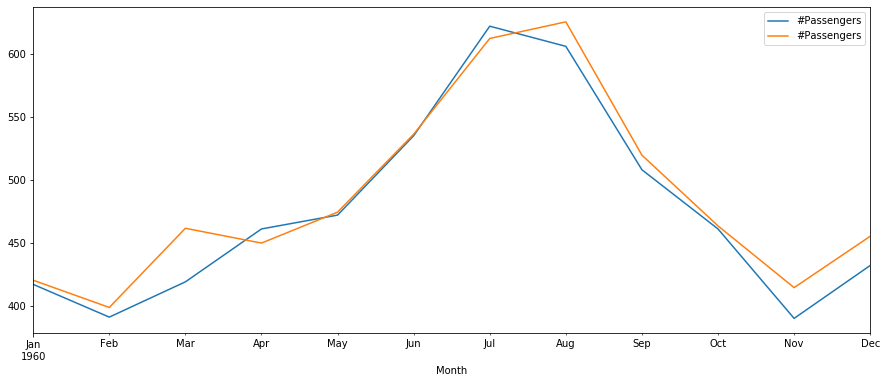

In [13]:
pd.concat([test, future_forecast], axis=1).plot()

O objetivo é sempre diminuir essa diferença.

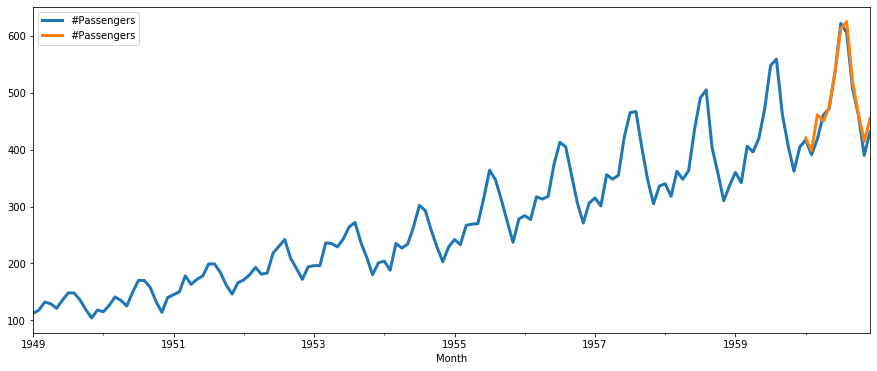

In [15]:
pd.concat([data, future_forecast], axis=1).plot(linewidth=3)

O auto arima conseguiu capturar bem os padrões de sazonalidade e tendência